Robust clustering

In [3]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

## Check clustering result 

In [4]:
with open("./clustering.pkl", "rb") as fp:
    cluster_result = pkl.load(fp)
cluster_result.keys()

N = cluster_result["km_objs"][0].cluster_centers_.shape[0]

In [30]:
adj_mat = cluster_result["same_prob"]
degree = [np.sum(adj_mat[i]) for i in range(adj_mat.shape[0])]

In [139]:
with open("./data/network.pkl", "wb") as fp:
    pkl.dump({"adj_mat": adj_mat,
              "degree": degree}, fp)

(4725, 4725)

### Draw network 

In [36]:
import networkx as nx

In [135]:
np.random.seed(300)

# Show top100 nodes
nshow = 1000

# node_id = np.argsort(degree)[::-1]
# node_id = node_id[:nshow]
node_id = np.random.choice(adj_mat.shape[0], size=nshow, replace=False, p=np.array(degree)/np.sum(degree))
edges = [(i, j, adj_mat[i, j]) for i in node_id for j in node_id if i != j]
weight = np.array([e[2] for e in edges])

In [136]:
G = nx.Graph()
G.add_nodes_from(node_id)
G.add_weighted_edges_from(edges)

In [138]:
nx.write_gexf(G, "graph.gexf")

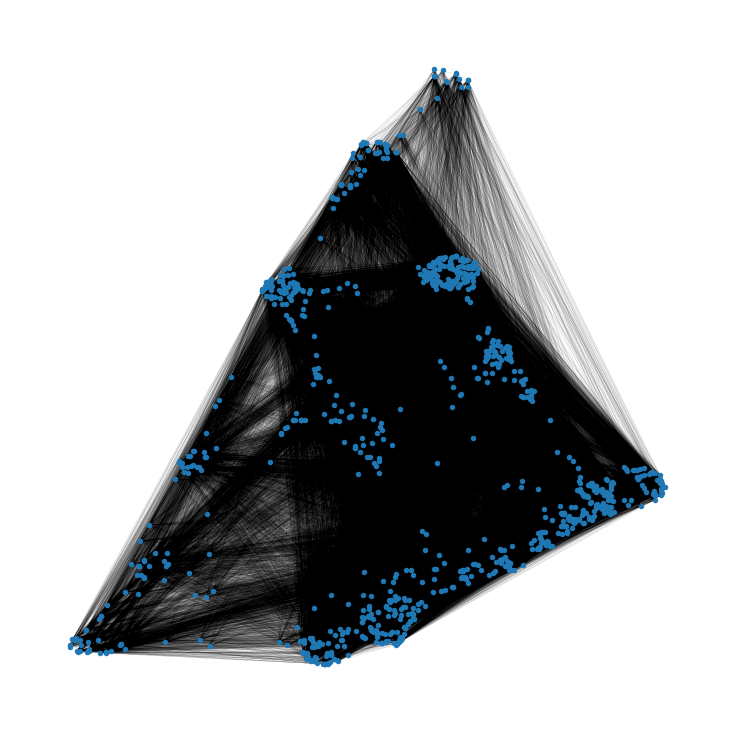

In [137]:
np.random.seed(300)

plt.figure(figsize=(10, 10))
# nx.draw(G, pos=nx.fruchterman_reingold_layout(G), width=weight*0.05, node_size=50)
nx.draw(G, pos=nx.spring_layout(G), width=weight*0.01, node_size=20)
plt.show()